# ML Answers

- **Answer Set**: No. 01
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as disp
import functools as fn

### Dataset

Now we can load our dataset:

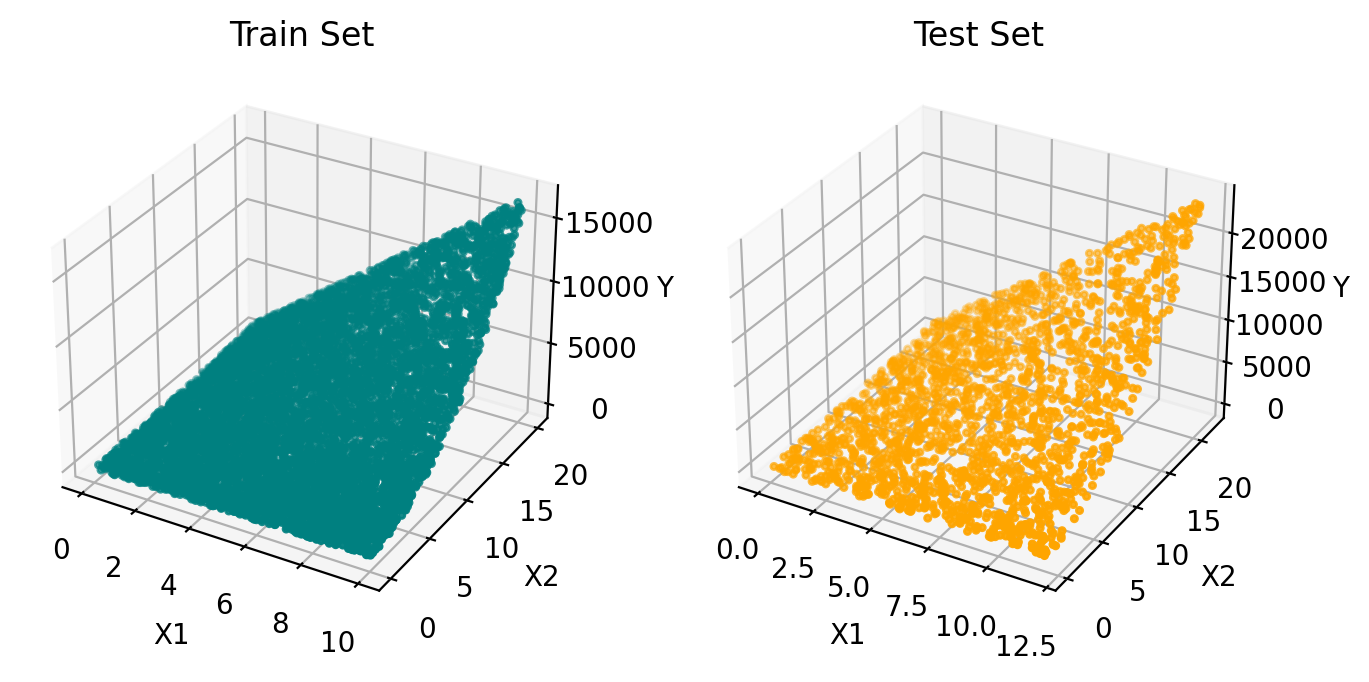

In [66]:
data = np.load("../lib/data.npz")

x1 = data["x1"]
x2 = data["x2"]
y = data["y"]

x1_test = data["x1_test"]
x2_test = data["x2_test"]
y_test = data["y_test"]

fig = plt.figure(figsize=(8, 6), dpi=200)

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.scatter(x1, x2, y, marker=".", c="teal")
ax1.set_title("Train Set")
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_zlabel("Y")

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.scatter(x1_test, x2_test, y_test, marker=".", c="orange")
ax2.set_title("Test Set")
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_zlabel("Y")

plt.show()

### Features Function

A useful function, that generates a feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree:

In [67]:
def features_matrix(features, degree):
    result = []

    for i in range(0, degree + 1):
        for coeffs in polynomial_coefficients(len(features), i, 0):
            terms = [np.power(features[index], coeff) for index, coeff in enumerate(coeffs)]
            result.append(np.prod(terms, axis=0))
    
    return np.array(result)

def polynomial_coefficients(terms, degree, index):
    result = []

    if index == terms - 1:
        return [[degree]]

    for i in range(degree, -1, -1):
        for coeff in polynomial_coefficients(terms, degree - i, index + 1):
            result.append([i] + coeff)

    return result

---

## Problem (a)

### Cost Function

First, we define the **Cost Function** using **SSE** formula:

$$
\begin{aligned}
    & J(\Theta) = \frac{1}{2m} (X\Theta - Y)^T (X\Theta - Y)
\end{aligned}
$$

In [68]:
def cost_function(X, Y, W):
    Error = X @ W - Y
    return (1 / (2 * len(Y))) * (Error.T @ Error)

### Train Function

Now, we use the direct algebraic way for computing the weights:

$$
\begin{aligned}
    & \Theta = (X^T X)^{-1} X^T Y
\end{aligned}
$$

In [69]:
def train_model(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

### Train Models

In this section, we will use our predefined functions for training our models and computing cost values:

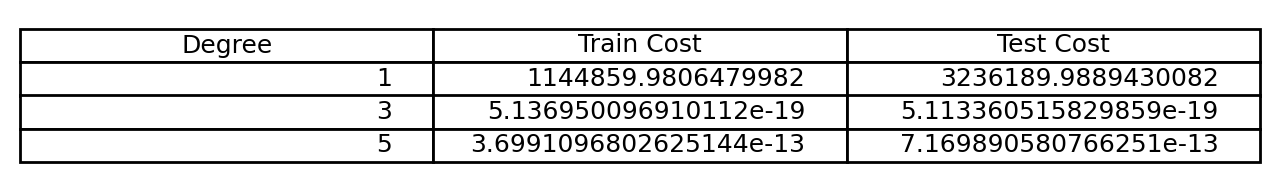

In [70]:
costs = []
for degree in range(1, 7, 2):
    W = train_model(features_matrix([x1, x2], degree).T, y)
    costs.append([
        degree,
        cost_function(features_matrix([x1, x2], degree).T, y, W),
        cost_function(features_matrix([x1_test, x2_test], degree).T, y_test, W)
    ])

plt.figure(figsize=(8, 1), dpi=200)
plt.table(cellText=costs, colLabels=["Degree", "Train Cost", "Test Cost"], loc='center')
plt.axis("off")
plt.show()

### Results

As we can see, the error value for model of degree 1 is too high because it has **Underfitting** problem, the model with degree 3 is a **Good fit** because the actual model formula was from the degree of 3, and the model with degree 5 has introduced some additional errors because of **Overfitting** problem:

- **Degree 1**: Underfit
- **Degree 3**: Goodfit
- **Degree 5**: Overfit

---

## Problem (b)

### Gradient Function

First, we define the **Gradient Function** using **SSE Derivation** formula:

$$
\begin{aligned}
    & \frac{\partial J(\Theta)}{\partial \Theta} = \frac{1}{m} X^T (X\Theta - Y)
\end{aligned}
$$

In [80]:
def gradient_function(X, Y, W):
    Error = X @ W - Y
    return (1 / len(Y)) * (X.T @ Error)

### Train Function

Now, we use the iterative gradient descent algorithm for computing the weights:

$$
\begin{aligned}
    & \Theta_{i} = \Theta_{i-1} - \alpha.\frac{\partial J(\Theta)}{\partial \Theta}
\end{aligned}
$$

In [133]:
def train_model(X, Y, minStepSize=0.00001, maxStepSize=1500, maxStepCount=100000, learningRate=0.0005):
    W = np.ones(len(X[0]))
    gradients = np.zeros(maxStepCount)

    for i in range(0, maxStepCount):
        gradient = gradient_function(X, Y, W)

        gradients[i] = cost_function(X, Y, W)

        step = learningRate * gradient

        if np.linalg.norm(step) < minStepSize:
            break
        
        if np.linalg.norm(step) > maxStepSize:
            return train_model(X, Y, minStepSize, maxStepSize, maxStepCount, learningRate/10)

        W = W - step

    return (W, learningRate, gradients)

### Train Models

In this section, we will use our predefined functions for training our models and computing cost values:

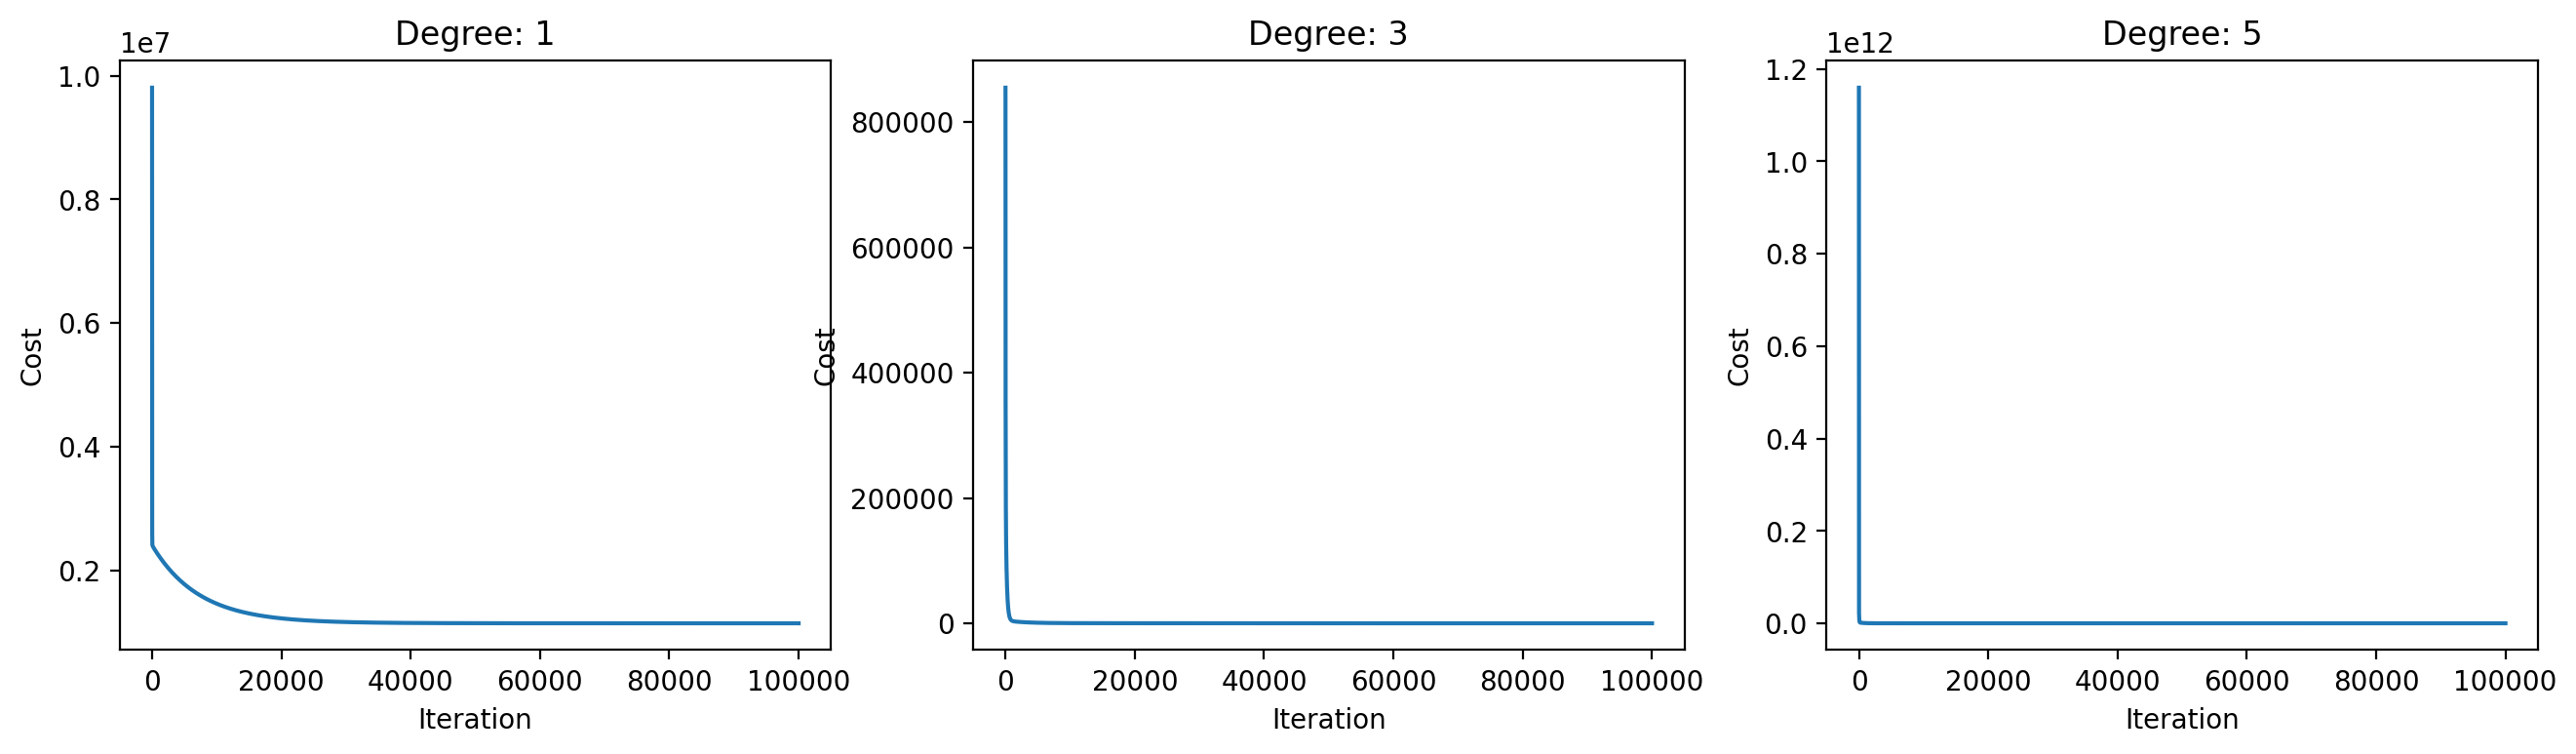

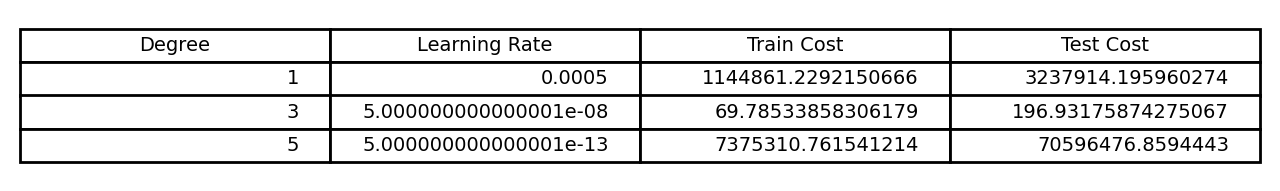

In [134]:
degrees = range(1, 7, 2)
costs = []

fig = plt.figure(figsize=(16, 4), dpi=200)

index = 0
for degree in degrees:
    index += 1
    (W, rate, gradients) = train_model(features_matrix([x1, x2], degree).T, y)

    axis = fig.add_subplot(1, len(degrees), index)
    axis.plot(range(0, len(gradients)), gradients)
    axis.set_title(f"Degree: {degree}")
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Cost")
    
    costs.append([
        degree,
        rate,
        cost_function(features_matrix([x1, x2], degree).T, y, W),
        cost_function(features_matrix([x1_test, x2_test], degree).T, y_test, W)
    ])
plt.show()

plt.figure(figsize=(8, 1), dpi=200)
plt.table(cellText=costs, colLabels=["Degree", "Learning Rate", "Train Cost", "Test Cost"], loc='center')
plt.axis("off")
plt.show()

### Results

As we can see, the error value for model of degree 1 is too high because it has **Underfitting** problem, the model with degree 3 is a **Good fit** because the actual model formula was from the degree of 3, and the model with degree 5 has introduced some additional errors because of **Overfitting** problem:

- **Degree 1**: Underfit
- **Degree 3**: Goodfit
- **Degree 5**: Overfit

---

## Problem (c)

### Cost Function

First, we define the **Regularized Cost Function** using **SSE** formula and **L2** method for regularization:

$$
\begin{aligned}
    & J(\Theta) = \frac{1}{2m} (X\Theta - Y)^T (X\Theta - Y) + \Theta^2
\end{aligned}
$$

In [ ]:
def cost_function(X, Y, W):
    Error = X @ W - Y
    return (1 / (2 * len(Y))) * (Error.T @ Error) + W.W

### Train Function

Now, we use the direct algebraic way for computing the weights:

$$
\begin{aligned}
    & \Theta = (X^T X + \lambda I)^{-1} X^T Y
\end{aligned}
$$

In [ ]:
def train_model(X, Y, L):
    I = np.eye(len(X[0]))

    return np.linalg.inv((X.T @ X) + (L * I)) @ X.T @ Y

### Train Models

### Results

---